In [1741]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [1742]:
df = pd.read_csv("./heart.csv")

In [1743]:
df.mean()
# df

age          54.434146
sex           0.695610
cp            0.942439
trestbps    131.611707
chol        246.000000
fbs           0.149268
restecg       0.529756
thalach     149.114146
exang         0.336585
oldpeak       1.071512
slope         1.385366
ca            0.754146
thal          2.323902
target        0.513171
dtype: float64

In [1744]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [1745]:
# df.isna().sum()
print(df.duplicated().sum())
df=df.drop_duplicates()
print(df.duplicated().sum())

723
0


In [1746]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [1747]:
# columns_to_standerdize=["age","trestbps","chol","thalach","oldpeak"]
# for column in columns_to_standerdize:
    # df[column] = (df.loc[column]-df[column].mean()) / df[column].std()
# df=(df-df.mean())/df.std()
for i in df.columns:
    if(i!='target'):
        df[i]=(df[i]-df[i].mean())/df[i].std()

In [1748]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267522,0.681525,-0.933658,-0.375932,-0.666622,-0.417753,0.900163,0.804700,-0.697187,-0.037063,0.977891,1.272867,1.118111,0
1,-0.157000,0.681525,-0.933658,0.478117,-0.840523,2.385833,-1.000880,0.237102,1.429586,1.771019,-2.267418,-0.713727,1.118111,0
2,1.721875,0.681525,-0.933658,0.762800,-1.400872,-0.417753,0.900163,-1.072740,1.429586,1.340523,-2.267418,-0.713727,1.118111,0
3,0.727176,0.681525,-0.933658,0.933609,-0.840523,-0.417753,0.900163,0.499070,-0.697187,-0.898054,0.977891,0.279570,1.118111,0
4,0.837698,-1.462439,-0.933658,0.364243,0.917813,2.385833,0.900163,-1.902307,-0.697187,0.737829,-0.644764,2.266164,-0.513143,0


## Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

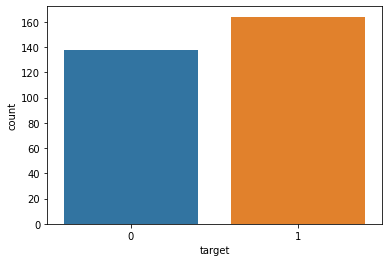

In [1749]:
sns.countplot(x="target",data=df)
# more people have heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

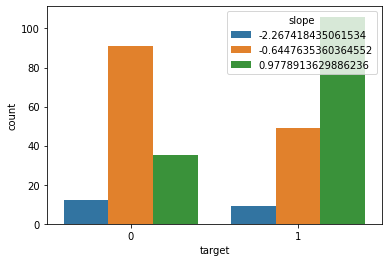

In [1750]:
sns.countplot(x="target",hue="slope",data=df)
#slope=2 are more likely to have a heart disease


<AxesSubplot:xlabel='target', ylabel='count'>

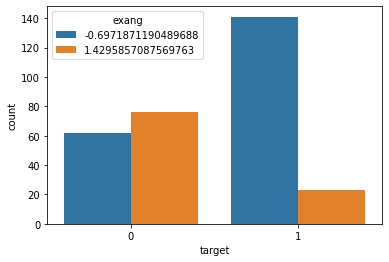

In [1751]:
sns.countplot(x="target",hue="exang",data=df)
#exang=0 are more likely to have a heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

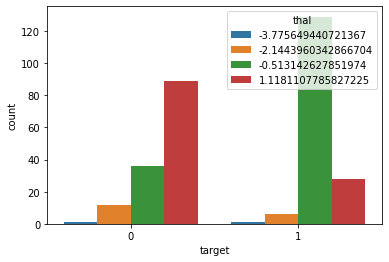

In [1752]:
sns.countplot(x="target",hue="thal",data=df)
#thal=2 are more likely to have a heart disease

<AxesSubplot:xlabel='target', ylabel='count'>

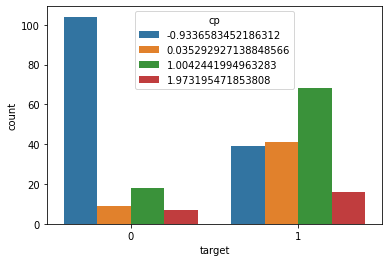

In [1753]:
sns.countplot(x="target",hue="cp",data=df)
#cp=2 are more likely to have a heart disease
#cp=0 are more likely to not have a heart disease

# Spliting the data for Testing and Training

In [1754]:
def split_data(X,Y):
    np.random.seed(0)
    mask = np.random.rand(X.shape[0])<=0.80
    X_train = X[mask]
    X_test =  X[~mask]
    Y_train = Y[mask]
    Y_test = Y[~mask]

    return X_train,X_test,Y_train,Y_test

# **Logistic Regression**

In [1755]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def find_accuracy(Ypred,Y):
    train_accuracy=0
    for i in range(len(Ypred)):
        if(Ypred[i]==Y[i]):
            train_accuracy+=1
    train_accuracy/=len(Ypred)
    return train_accuracy

def f1_score(Ypred,Y):
    tp=0
    fn=0
    fp=0
    for i in range(len(Ypred)):
        if(Ypred[i]==Y[i]):
            if(Ypred[i]==1): tp+=1
        else: 
            if(Ypred[i]==1 and Y[i]==0): fp+=1
            if(Ypred[i]==0 and Y[i]==1): fn+=1
    recall=tp/(tp+fn)
    pression=tp/(tp+fp)
    f1=(2*recall*pression)/(recall+pression)
    return f1
    

## *Univariate*

In [1756]:
X=np.ones((df.shape[0],2))
X[:,1]=df.loc[:,'cp']
Y=df.loc[:,'target']

X_train,X_test,Y_train,Y_test=split_data(X,Y)
Y_train.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

In [1757]:
learning_rate=0.005
itrns=1350
W=np.ones((X_train.shape[1]))
cost=[]
iterations=[]
for i in range(itrns):
    W=W-(learning_rate/X_train.shape[0])*(X_train.T@(sigmoid(X_train@W)-Y_train))
    # Ypred_train=np.array(sigmoid(X_train@W))
#     a=np.dot(Y_train.T,np.log(Ypred_train))
#     b=np.dot((1-Y_train).T,np.log(1-Ypred_train))
#     cost_value = np.sum(a+b) /(len(Ypred_train))
#     iterations.append(i+1)
#     cost.append(cost_value)    
# iterations.reverse()
# plt.scatter(iterations,cost)
# plt.show()
Ypred_test=np.array(sigmoid(X_test@W))
for i in range(len(Ypred_test)):
    if(Ypred_test[i]>=0.5):
        Ypred_test[i]=1
    else:
        Ypred_test[i]=0

test_accuracy=find_accuracy(Ypred_test,Y_train)
test_f1score=f1_score(Ypred_test,Y_train)
print("F1 score of Testing data: ", test_f1score)
print("Accuracy of Testing data: ", test_accuracy)



F1 score of Testing data:  0.4482758620689655
Accuracy of Testing data:  0.4666666666666667


## *Multivariate*

In [1758]:
X=df.iloc[:,:]
X=X.drop(["target"],axis=1)
X["constant"]=1

Y=df.loc[:,'target']

X_train,X_test,Y_train,Y_test=split_data(X,Y)
Y_train.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
X_train.reset_index(drop=True,inplace=True)

In [1759]:
learning_rate=0.005
itrns=1350
W=np.ones((X_train.shape[1]))
cost=[]
iterations=[]
for i in range(itrns):
    W=W-(learning_rate/X_train.shape[0])*(X_train.T@(sigmoid(X_train@W)-Y_train))
#     Ypred_train=np.array(sigmoid(X_train@W))
#     a=np.dot(Y_train.T,np.log(Ypred_train))
#     b=np.dot((1-Y_train).T,np.log(1-Ypred_train))
#     cost_value = np.sum(a+b) /(len(Ypred_train))
#     iterations.append(i+1)
#     cost.append(cost_value)    
# iterations.reverse()
# plt.scatter(iterations,cost)
# plt.show()
Ypred_test=np.array(sigmoid(X_test@W))
for i in range(len(Ypred_test)):
    if(Ypred_test[i]>=0.5):
        Ypred_test[i]=1
    else:
        Ypred_test[i]=0

test_accuracy=find_accuracy(Ypred_test,Y_train)
test_f1score=f1_score(Ypred_test,Y_train)
print("F1 score of Testing data: ", test_f1score)
print("Accuracy of Testing data: ", test_accuracy)


F1 score of Testing data:  0.5806451612903226
Accuracy of Testing data:  0.5666666666666667


## Sklearn Implementation(Logistic regression)

In [1760]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1350)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1350)

In [1761]:
print('Accuracy of Testing data: ',metrics.accuracy_score(Y_test, model.predict(X_test)))
print('F1 Score of Testing data: ',metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy of Testing data:  0.8833333333333333
F1 Score of Testing data:  0.904109589041096


# **Naive Bayes**

In [1762]:
def likelihood(x, mu, sigma):
    return 1/((sigma * np.sqrt(2 * np.pi)) * (np.exp( - (x - mu)**2 / (2 * sigma**2))))

## *Univariate*

In [1763]:
X=df.loc[:,['cp','target']]
Y=df.loc[:,'target']

X_train,X_test,Y_train,Y_test=split_data(X,Y)
Y_train.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

Disease=X_train.loc[X_train.loc[:,'target']==1]
noDisease=X_train.loc[X_train.loc[:,'target']==0]
Disease=Disease.loc[:,'cp']
noDisease=noDisease.loc[:,'cp']
X_test=X_test.loc[:,'cp']

mu_Disease=Disease.mean()
sigma_Disease=Disease.std()
mu_noDisease=noDisease.mean()
sigma_noDisease=noDisease.std()

a=Y.value_counts()
prob_Disease=a[1]/(a[1]+a[0])
prob_noDisease=a[0]/(a[1]+a[0])

Ypred_test=np.zeros((Y_test.shape[0],1))

for i in range(len(X_test)):
    likelihood_Disease=likelihood(X_test[i],mu_Disease,sigma_Disease)
    probD=likelihood_Disease*prob_Disease
    likelihood_noDisease=likelihood(X_test[i],mu_noDisease,sigma_noDisease)
    probNoD=likelihood_noDisease*prob_noDisease
    if(probD>=probNoD):
        Ypred_test[i]=1
    else:
        Ypred_test[i]=0

test_accuracy=find_accuracy(Ypred_test,Y_train)
test_f1score=f1_score(Ypred_test,Y_train)
print("F1 score of Testing data: ", test_f1score)
print("Accuracy of Testing data: ", test_accuracy)


F1 score of Testing data:  0.4814814814814815
Accuracy of Testing data:  0.5333333333333333


## *Multivariate*

In [1764]:
X=df.loc[:,:]
Y=df.loc[:,'target']

X_train,X_test,Y_train,Y_test=split_data(X,Y)
Y_train.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

Disease=X_train.loc[X_train.loc[:,'target']==1]
noDisease=X_train.loc[X_train.loc[:,'target']==0]
Disease=Disease.drop(['target'],axis=1)
noDisease=noDisease.drop(['target'],axis=1)
X_test=X_test.drop(['target'],axis=1)

a=Y_test.value_counts()
prob_Disease=a[1]/(a[1]+a[0])
prob_noDisease=a[0]/(a[1]+a[0])

Ypred_test=np.ones((Y_test.shape[0],1))
X_test=X_test.to_numpy()
for i in range(len(X_test)):
    for j in range(X_test.shape[1]):
        likelihood_Disease*=likelihood(X_test[i][j],Disease.mean()[j],Disease.std()[j])
        likelihood_noDisease*=likelihood(X_test[i][j],noDisease.mean()[j],noDisease.std()[j])
    probD=likelihood_Disease*prob_Disease
    probNoD=likelihood_noDisease*prob_noDisease
    if(probD>=probNoD):
        Ypred_test[i]=1
    else:
        Ypred_test[i]=0

test_accuracy=find_accuracy(Ypred_test,Y_train)
test_f1score=f1_score(Ypred_test,Y_train)
print("F1 score of Testing data: ", test_f1score)
print("Accuracy of Testing data: ", test_accuracy)

F1 score of Testing data:  0.6046511627906976
Accuracy of Testing data:  0.43333333333333335
